## Lead Score - Case Study
By Tejas Pathak and Gayathry

Problem Statements:

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goals of the Case Study
There are quite a few goals for this case study:

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [2]:
# For Supressing Warnings throughout 
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Now we would be importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Modelling and ML

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

### Loading/Importing the data

In [4]:
# Importing the data

Leads_cs_df = pd.read_csv('Leads.csv')
Leads_cs_df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


In [5]:
# Lets check the data a bit
Leads_cs_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Lets check the data types and all columns
Leads_cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
Leads_cs_df.describe()

# Based on the counts we can see some have different counts having nulls and might require cleaning

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
Leads_cs_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Data Cleaning

In [9]:
# Lets start with checking if we can see for all the columns
Leads_cs_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# We can see in above that there are some values which have so many nulls more than 2500
# Removing them would be the best thing

# But we can see that some columns look important

Leads_cs_df['What is your current occupation'].value_counts()

# We cannot drop this as this looks important
# Lets choose a larger number that is 3000 which is 1/3rd of 9000

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [11]:
# Dropping columns having more than 
 
Leads_cs_df.drop(columns=[col for col in Leads_cs_df.columns if Leads_cs_df[col].isnull().sum() > 3000], inplace=True)

In [12]:
Leads_cs_df.isnull().sum().sort_values(ascending= False)

# We can see that nulls having more than 3000

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [13]:
# Based on some column distinct values we can see Select which does not signify anything so we will remove that

Leads_cs_df = Leads_cs_df.replace('Select', np.NaN)

In [14]:
Leads_cs_df['Lead Profile'].value_counts() 

Lead Profile
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [15]:
Leads_cs_df['What matters most to you in choosing a course'].value_counts() 
# Does not look a good field that signifies much
# Can be considered to be removed

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [16]:
Leads_cs_df['What is your current occupation'].value_counts()
# Good variable that signifies important aspects 

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [17]:
Leads_cs_df['Country'].value_counts(dropna = False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [18]:
# We can see some false or null values as well still we will declare them as not given 
Leads_cs_df['Country'] = Leads_cs_df['Country'].fillna('Not Given')



In [19]:
Leads_cs_df['Specialization'].value_counts(dropna= False)


Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [20]:
# Similary for Specialization as well
Leads_cs_df['Specialization'] =  Leads_cs_df['Specialization'].fillna('Not Given')

In [21]:
Leads_cs_df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [22]:
Leads_cs_df['What is your current occupation'] = Leads_cs_df['What is your current occupation'].fillna('Not Given')

In [23]:
Leads_cs_df.isnull().sum().sort_values(ascending= False)

How did you hear about X Education               7250
Lead Profile                                     6855
City                                             3669
What matters most to you in choosing a course    2709
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Newspaper Article                                   0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
Prospect ID                 

In [24]:
Leads_cs_df['What matters most to you in choosing a course'].value_counts(dropna= False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [25]:
Leads_cs_df['What matters most to you in choosing a course'] = Leads_cs_df['What matters most to you in choosing a course'].fillna('Not Given')

In [26]:
Leads_cs_df['How did you hear about X Education'].value_counts(dropna= False)

How did you hear about X Education
NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [27]:
Leads_cs_df['How did you hear about X Education'] = Leads_cs_df['How did you hear about X Education'].fillna('Not Given')

In [28]:
Leads_cs_df['Lead Profile'].value_counts(dropna= False)

Lead Profile
NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [29]:
Leads_cs_df['Lead Profile'] = Leads_cs_df['Lead Profile'].fillna('Not Given')

In [30]:
Leads_cs_df['City'].value_counts(dropna= False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [31]:
Leads_cs_df['City'] = Leads_cs_df['City'].fillna('Not Given')

In [32]:
Leads_cs_df['Lead Source'].value_counts(dropna=False)
Leads_cs_df['Lead Source'] = Leads_cs_df['Lead Source'].fillna('Not Given')

In [33]:
Leads_cs_df.isnull().sum().sort_values(ascending= False)

Page Views Per Visit                             137
TotalVisits                                      137
Last Activity                                    103
Prospect ID                                        0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                              0
Through Recommendations                            0
Receive More Updates About Our Courses             0
Update me on Supply Chain Content                  0
Magazine                                           0
Get updates on DM Content                          0
Lead Profile                                       0
City                                               0
I agree to pay the amount through cheque           0
A free copy of Mastering The Interview             0
Newspaper Article                                  0
What matters most to you in choosing a course      0
Search                                        

In [34]:
# As the null counts are not much big so we can impute them using median values

Leads_cs_df['TotalVisits'].fillna(Leads_cs_df['TotalVisits'].median(), inplace=True)
Leads_cs_df['Page Views Per Visit'].fillna(Leads_cs_df['Page Views Per Visit'].median(), inplace=True)

## EDA

In [35]:
Leads_cs_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Not Given,Not Given,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Not Given,Not Given,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Not Given,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Not Given,Mumbai,No,No,Modified


In [36]:
Leads_cs_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [37]:
Leads_cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [38]:
# Univariate Analysis
object_columns = Leads_cs_df.select_dtypes(include=['object'])

# Loop through object columns 
for column in object_columns.columns:
    print(f"Univariate Analysis for {column}:")
    print(Leads_cs_df[column].value_counts())  # Shows frequency distribution
    print("\n")


Univariate Analysis for Prospect ID:
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64


Univariate Analysis for Lead Origin:
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


Univariate Analysis for Lead Source:
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Refer

In [39]:
object_columns.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

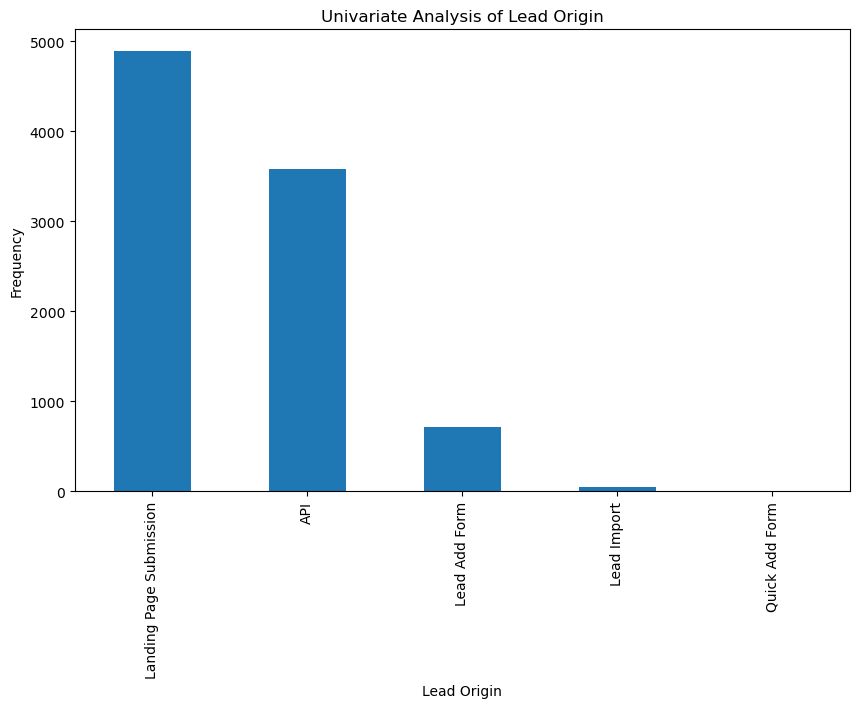

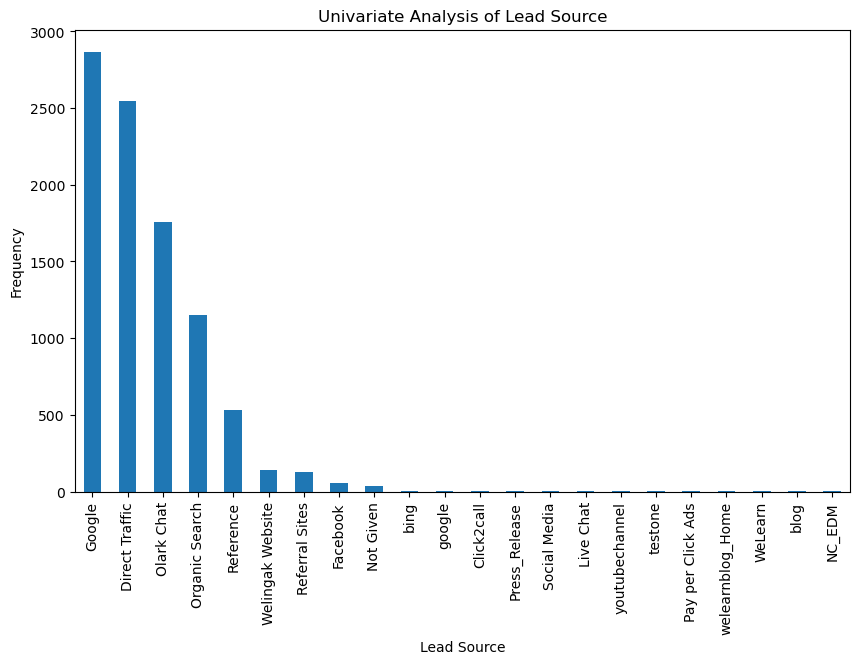

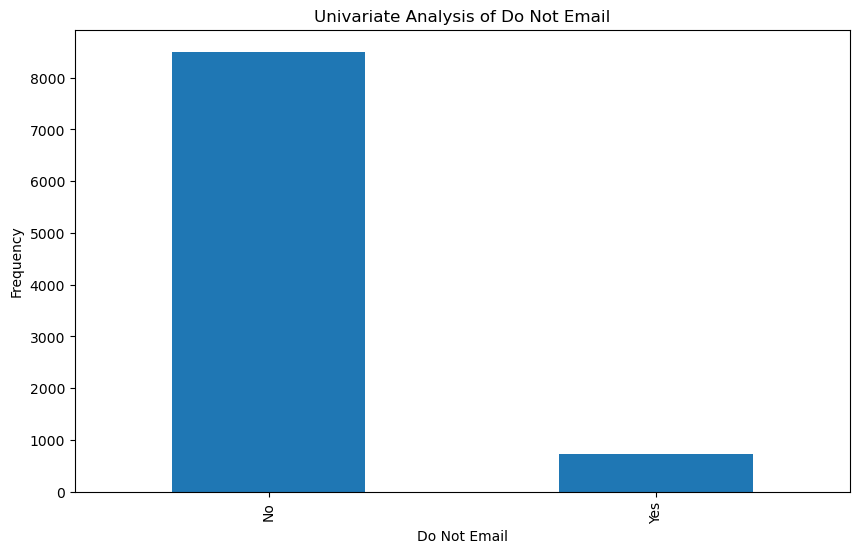

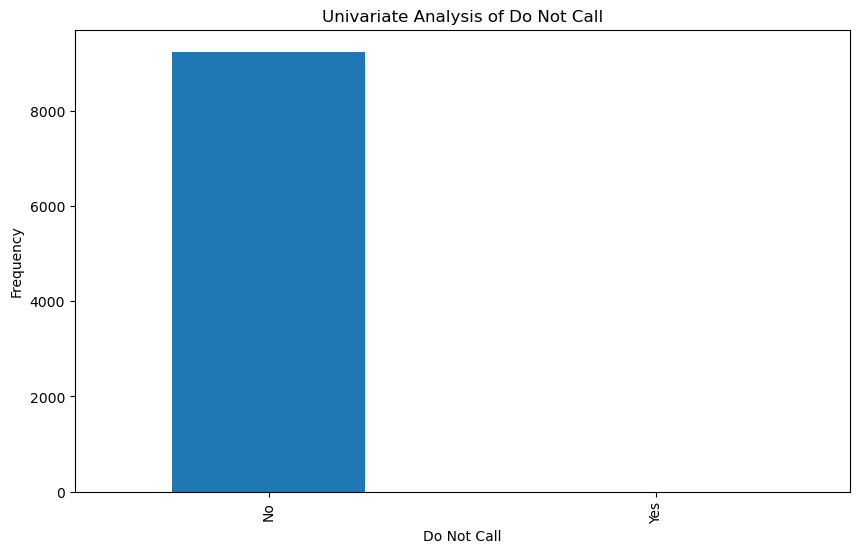

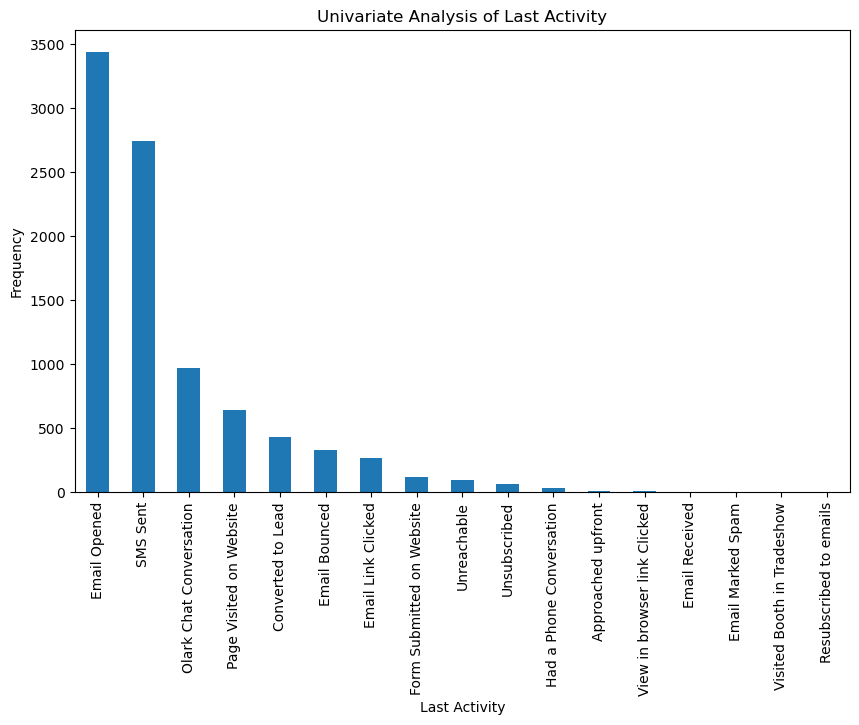

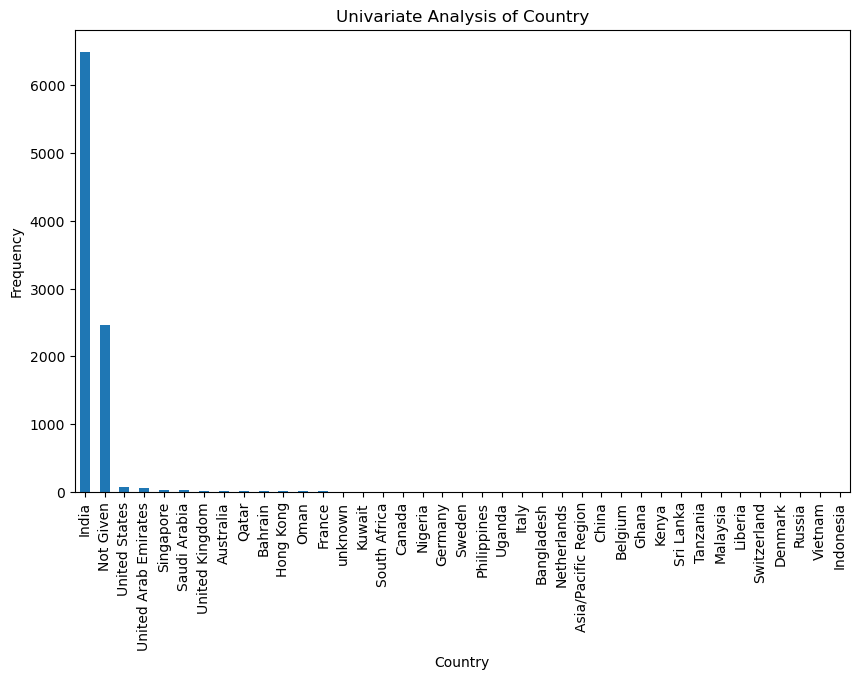

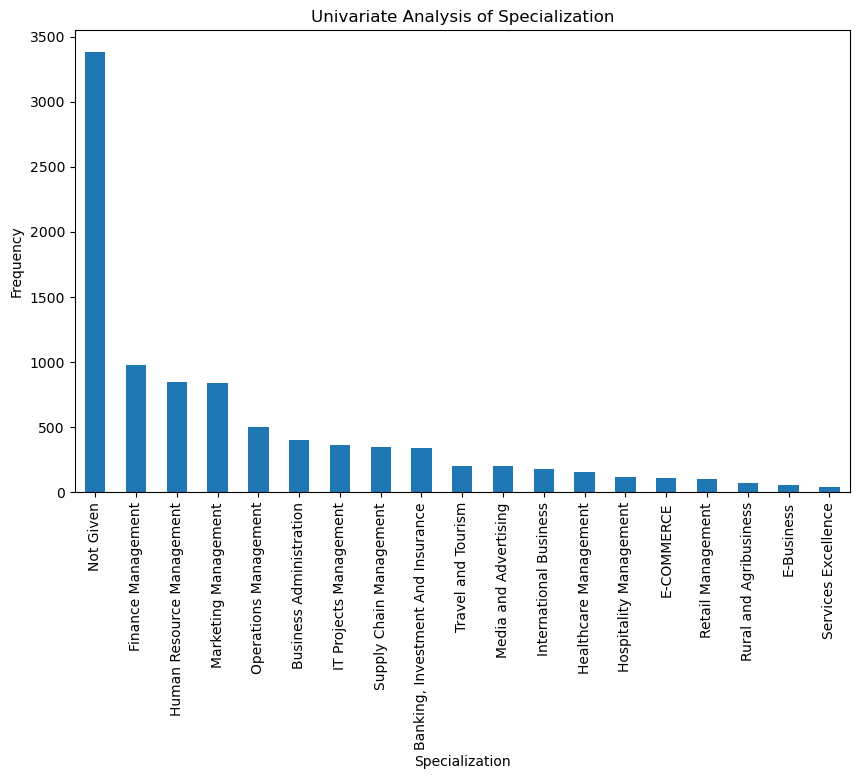

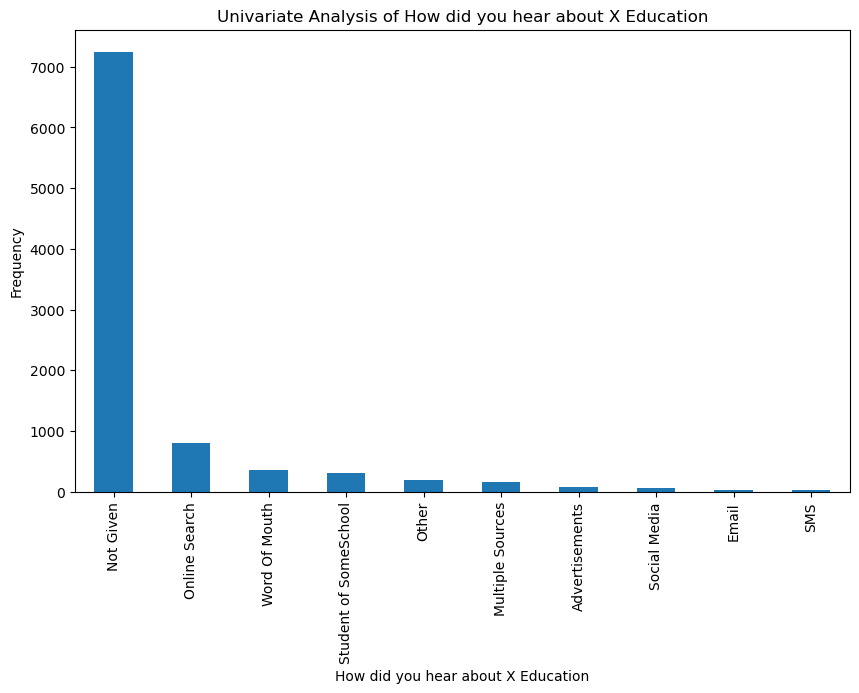

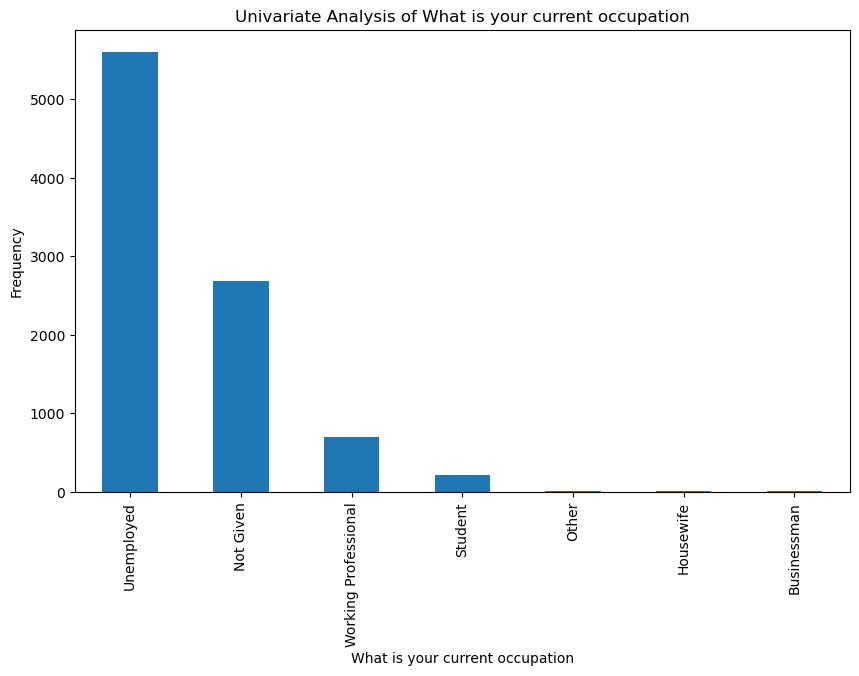

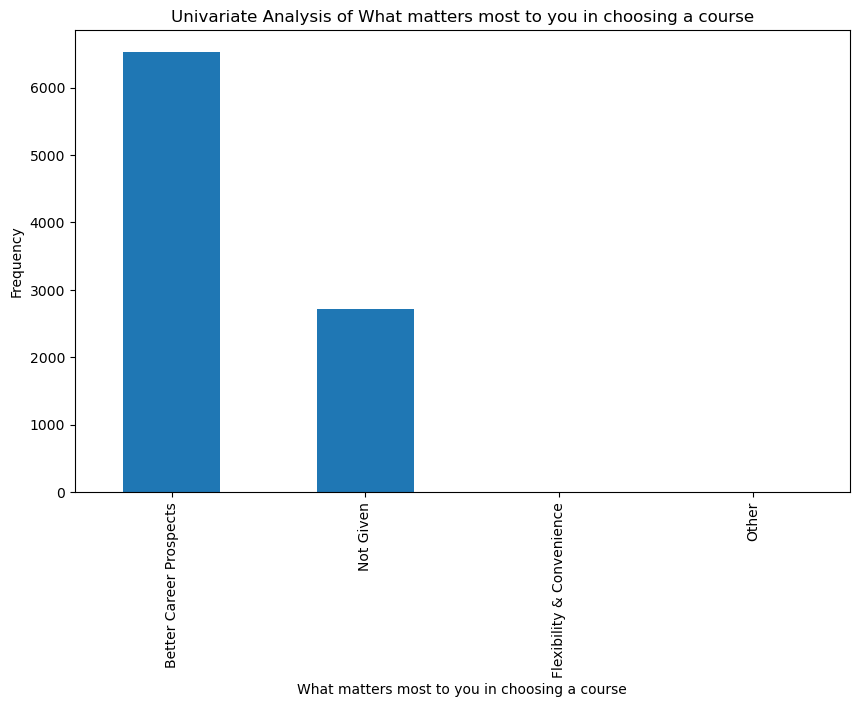

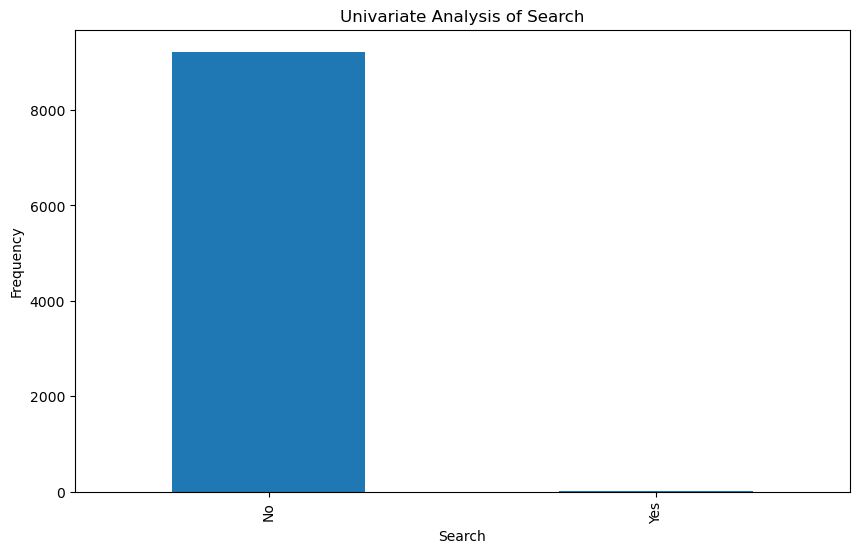

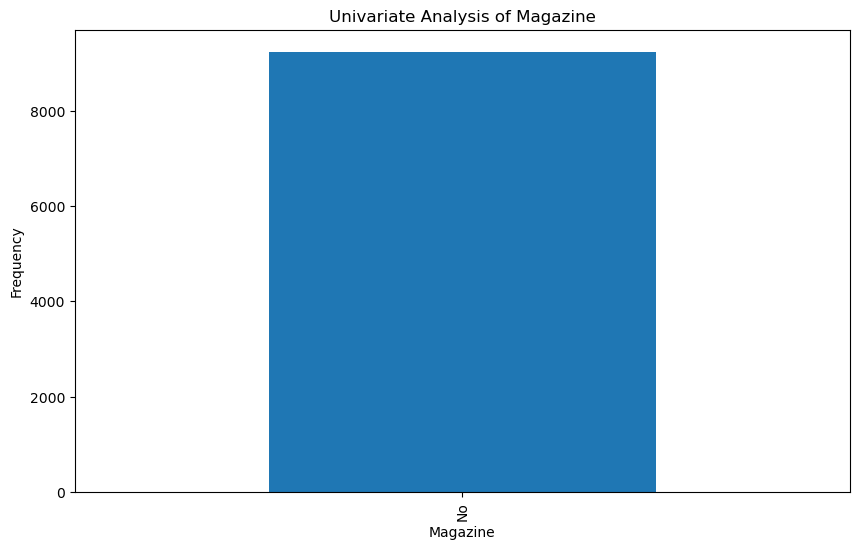

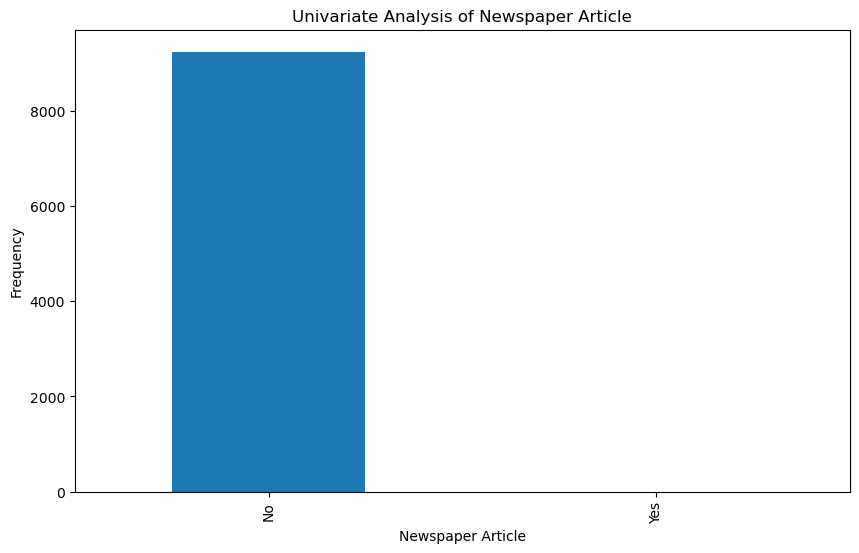

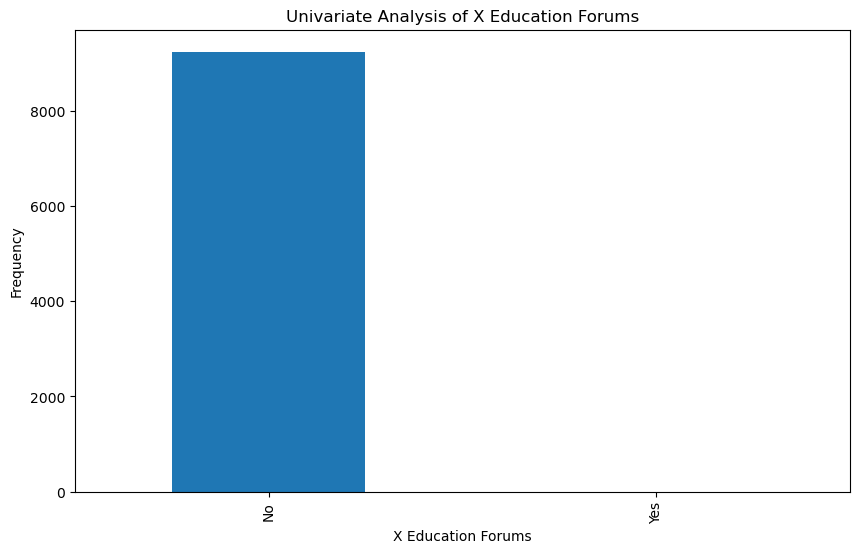

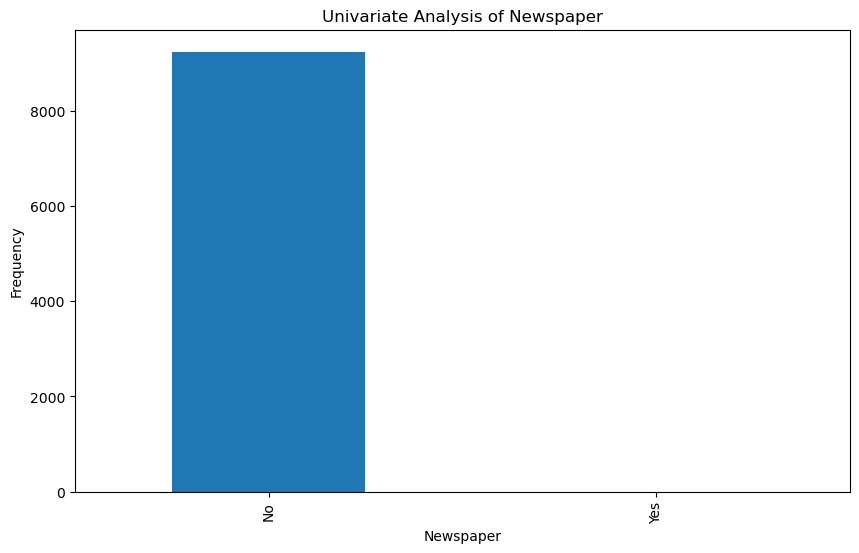

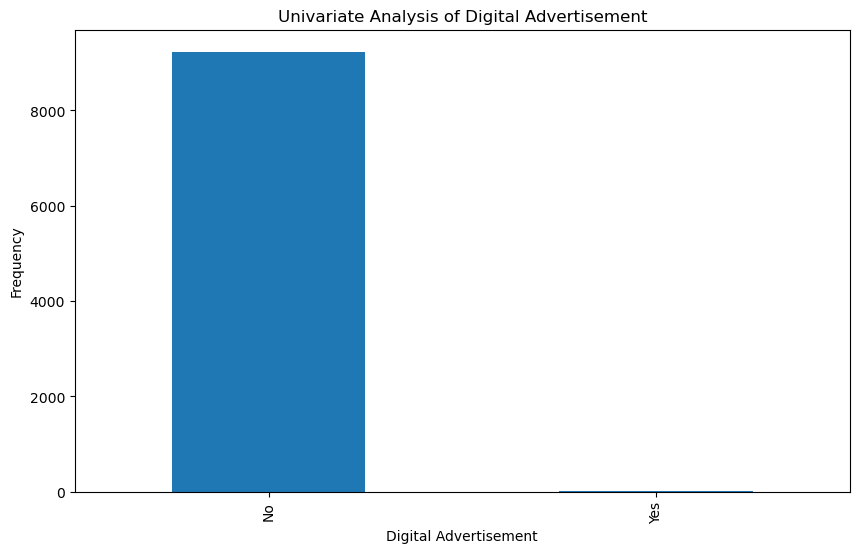

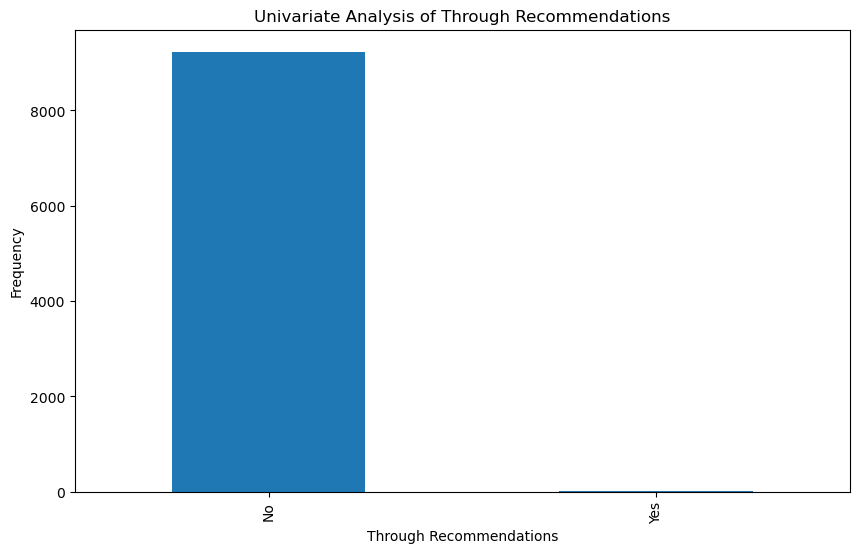

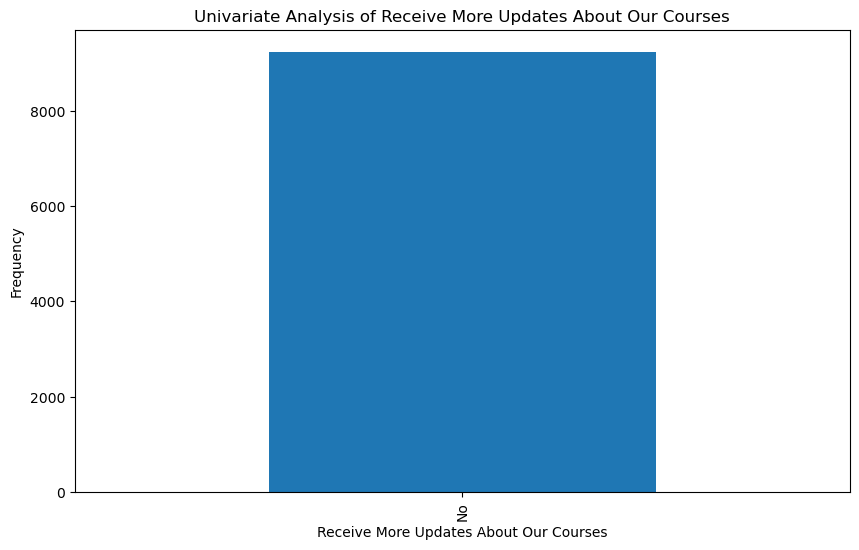

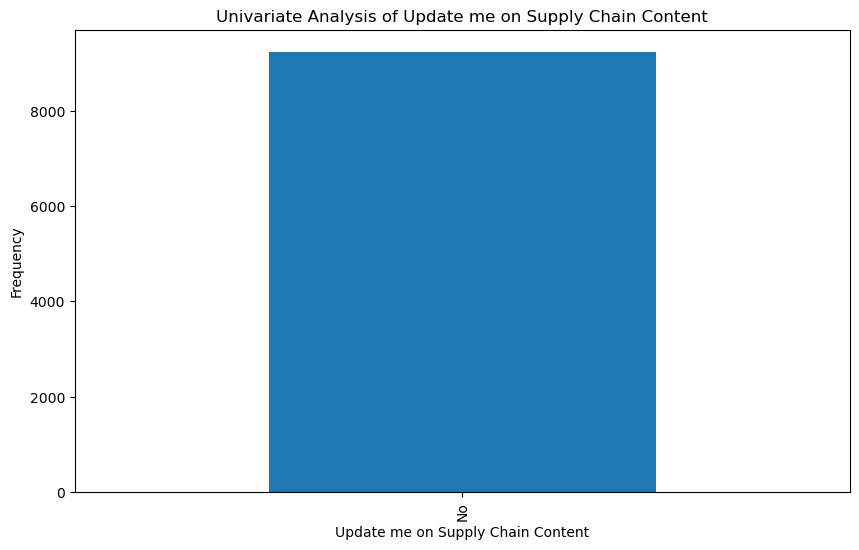

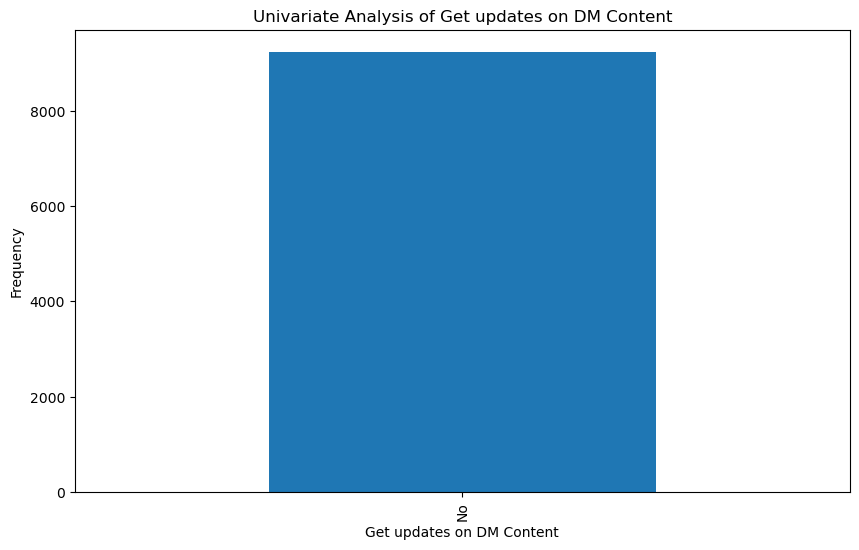

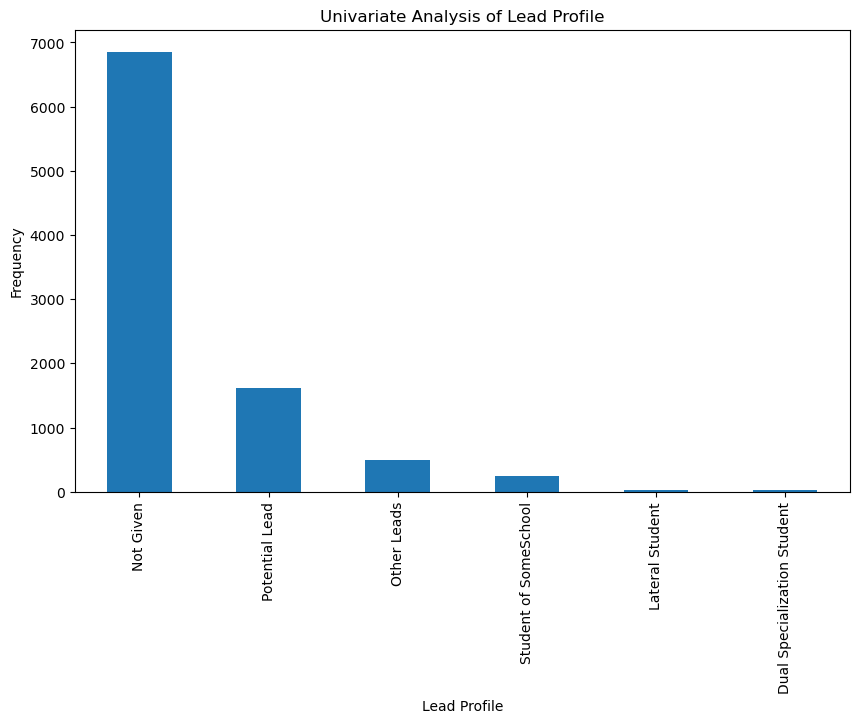

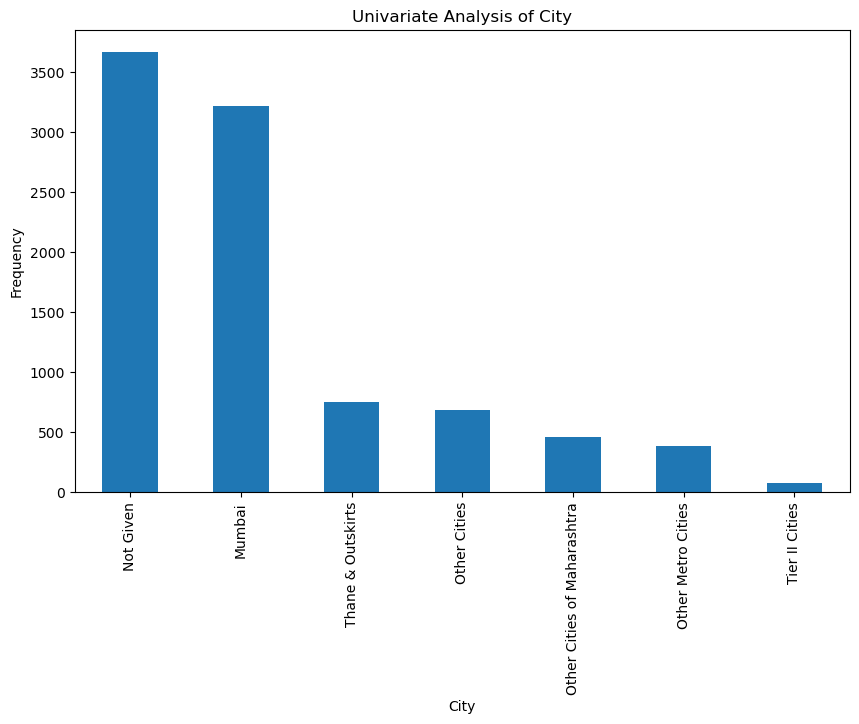

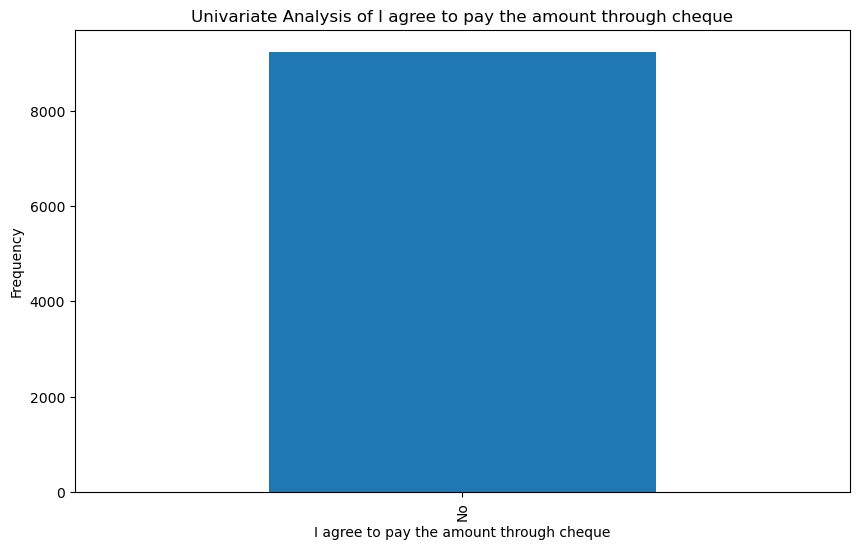

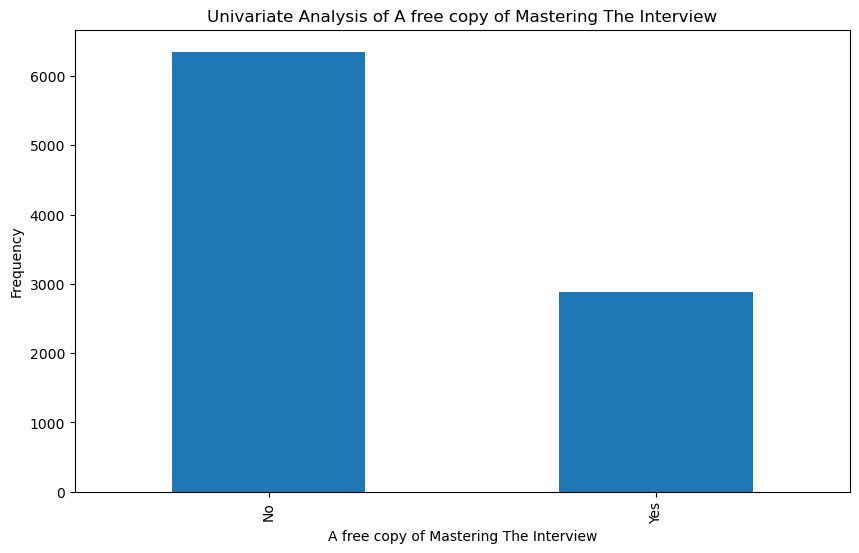

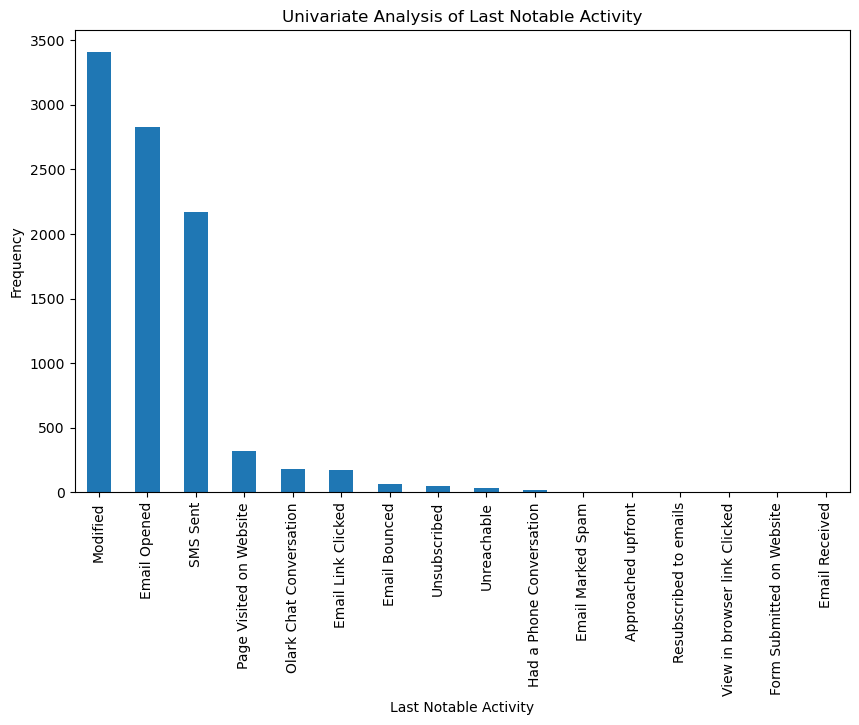

In [40]:
ObjectCols = ['Lead Origin', 'Lead Source', 'Do Not Email',
'Do Not Call', 'Last Activity', 'Country', 'Specialization',
'How did you hear about X Education', 'What is your current occupation',
'What matters most to you in choosing a course', 'Search', 'Magazine',
'Newspaper Article', 'X Education Forums', 'Newspaper',
'Digital Advertisement', 'Through Recommendations',
'Receive More Updates About Our Courses',
'Update me on Supply Chain Content', 'Get updates on DM Content',
'Lead Profile', 'City', 'I agree to pay the amount through cheque',
'A free copy of Mastering The Interview', 'Last Notable Activity']

for column in ObjectCols:
    plt.figure(figsize=(10, 6))
    Leads_cs_df[column].value_counts().plot(kind='bar')
    plt.title(f'Univariate Analysis of {column}')
    plt.ylabel('Frequency')
    plt.show()

In [41]:
Leads_cs_df['What matters most to you in choosing a course'].value_counts()

# This variable does not give any useful insights so we can drop this

Leads_cs_df.drop( columns=['What matters most to you in choosing a course'], inplace=True)

In [42]:
# Similary for several other columns like 'I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
# and some other columns as well can be dropped as they dont help in describing the data much

Leads_cs_df.drop(columns=['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], inplace = True)

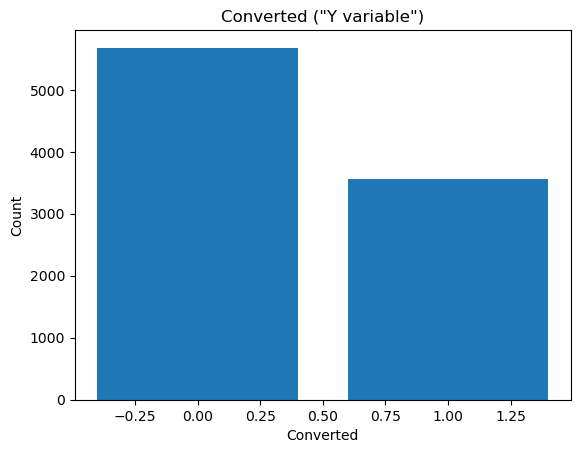

In [43]:
# Calculate value counts for the 'Converted' column
converted_counts = Leads_cs_df['Converted'].value_counts()

# Create a bar plot using matplotlib
plt.bar(converted_counts.index, converted_counts.values)

# Add title and labels
plt.title('Converted ("Y variable")')
plt.xlabel('Converted')
plt.ylabel('Count')

# Show the plot
plt.show()

In [44]:
# Select only numeric columns
numeric_df = Leads_cs_df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
numeric_df.corr()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Lead Number,1.000000,0.025157,0.021366,0.020329,0.057042
Converted,0.025157,1.000000,0.029119,0.362483,-0.005068
TotalVisits,0.021366,0.029119,1.000000,0.217341,0.512214
Total Time Spent on Website,0.020329,0.362483,0.217341,1.000000,0.314266
Page Views Per Visit,0.057042,-0.005068,0.512214,0.314266,1.000000


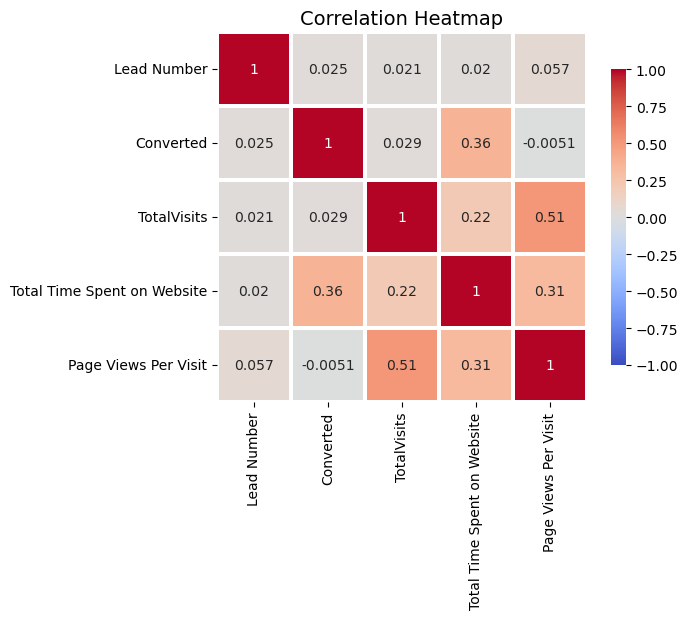

In [45]:
sns.heatmap(numeric_df.corr(), 
            annot=True,                  
            cmap="coolwarm",             
            robust=True,                 
            linewidths=1.5,              # Set thicker line width
            vmin=-1, vmax=1,             # Set min/max values for color bar
            annot_kws={"size": 10},      # Change font size for annotations
            cbar_kws={'shrink': 0.8},    
            square=True)                 

# Add title and display the heatmap
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

In [46]:
# The above correlation gives us a good idea about the how the data is related to each other

In [47]:
Leads_cs_df.loc[:, Leads_cs_df.dtypes == 'object']

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,Page Visited on Website,Not Given,Not Given,Not Given,Unemployed,Not Given,Not Given,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,Email Opened,India,Not Given,Not Given,Unemployed,Not Given,Not Given,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,Email Opened,India,Business Administration,Not Given,Student,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Not Given,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,Converted to Lead,India,Not Given,Other,Unemployed,Not Given,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,Landing Page Submission,Direct Traffic,Yes,Email Marked Spam,Saudi Arabia,IT Projects Management,Not Given,Unemployed,Potential Lead,Mumbai,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,Landing Page Submission,Direct Traffic,No,SMS Sent,India,Media and Advertising,Not Given,Unemployed,Potential Lead,Mumbai,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,Landing Page Submission,Direct Traffic,Yes,SMS Sent,India,Business Administration,Not Given,Unemployed,Potential Lead,Mumbai,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,Landing Page Submission,Google,No,SMS Sent,India,Human Resource Management,Online Search,Not Given,Not Given,Other Metro Cities,No,SMS Sent


In [48]:
# Before proceeding with one hot encoding Here Prospect Id and Lead Origin can be considered to be removed

Leads_cs_df.drop(columns=['Prospect ID', 'Lead Number'], inplace = True)

### Handling Categorical Values

In [49]:
# As Machine Learning algos are not able to interpret string data directly they require numerical values

# We will convert the categorical variables into multiple binary (0 or 1) columns
# This method is also known as one hot encoding which creates a new column for each category

# First we will take all the categorical columns in one place

CatColumns = Leads_cs_df.select_dtypes(include=['object'])
CatColumns.columns



Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [50]:
Leads_OHE_dummy = pd.get_dummies(Leads_cs_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first= True)

In [51]:
Leads_OHE_dummy = Leads_OHE_dummy.astype(int)

In [52]:
Leads_cs_df = pd.concat([Leads_cs_df, Leads_OHE_dummy], axis= 1)

In [53]:
Leads_cs_df

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.00,Page Visited on Website,Not Given,Not Given,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.50,Email Opened,India,Not Given,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.00,Email Opened,India,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.00,Unreachable,India,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.00,Converted to Lead,India,Not Given,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,0,2.0,199,2.00,SMS Sent,India,Business Administration,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,...,0,0,0,0,0,0,1,0,0,0


In [54]:
# Dropping the variables

Leads_cs_df.drop(columns= ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], inplace=True)

In [55]:
Leads_cs_df

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Model Preparation

In [56]:
# We have already imported necessary libs in our import section

# Firstly we will split our features in two variables

# Variable X

X = Leads_cs_df.drop(columns=['Converted'])

# Removing our Target variable and else all columns would be there


In [57]:
X

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.00,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.00,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.00,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.00,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,8.0,1845,2.67,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,2.0,238,2.00,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,2.0,199,2.00,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,3.0,499,3.00,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [58]:
y = Leads_cs_df.Converted

In [59]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64

In [60]:
# We will be now splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [61]:
X_train.shape

(6468, 143)

In [62]:
y_train.shape

(6468,)

In [63]:
X_train[['TotalVisits','Page Views Per Visit', 'Total Time Spent on Website']]

,TotalVisits,Page Views Per Visit,Total Time Spent on Website
1871,0.0,0.00,0
6795,4.0,1.33,487
3516,5.0,2.50,106
8105,5.0,5.00,1230
3934,0.0,0.00,0
...,...,...,...
350,0.0,0.00,0
79,3.0,2.00,705
8039,0.0,0.00,0
6936,2.0,2.00,238


In [64]:
# We can scale these using MinMax Scaling

scaler = MinMaxScaler()


In [65]:
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [66]:
X_train

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6795,0.015936,0.214349,0.024182,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3516,0.019920,0.046655,0.045455,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8105,0.019920,0.541373,0.090909,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3934,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
79,0.011952,0.310299,0.036364,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8039,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6936,0.007968,0.104754,0.036364,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [67]:
X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
TotalVisits,1.000000,0.187393,0.472658,0.271760,-0.154782,-0.028523,-0.001101,0.099421,-0.026879,0.096171,...,-0.003455,0.020496,-0.095934,-0.032126,0.240242,-0.008163,-0.014193,0.010896,-0.009534,NaN
Total Time Spent on Website,0.187393,1.000000,0.305472,0.272321,-0.135811,-0.034199,0.039434,0.129447,-0.032658,0.209653,...,-0.004480,0.020132,-0.100765,-0.058707,0.027783,-0.011010,0.126331,-0.002886,-0.007107,NaN
Page Views Per Visit,0.472658,0.305472,1.000000,0.482162,-0.258509,-0.047635,-0.001999,0.142194,-0.043621,0.201929,...,-0.001999,0.012847,-0.091823,-0.084464,0.021848,-0.013499,0.051953,0.026109,-0.004088,NaN
Lead Origin_Landing Page Submission,0.271760,0.272321,0.482162,1.000000,-0.310845,-0.075762,-0.013156,0.526186,-0.071415,0.087286,...,0.011754,0.001432,-0.104972,-0.108736,0.047417,-0.013156,0.063158,0.010393,0.002815,NaN
Lead Origin_Lead Add Form,-0.154782,-0.135811,-0.258509,-0.310845,1.000000,-0.021041,-0.003654,-0.179365,-0.021041,-0.198414,...,-0.003654,-0.012127,-0.008363,-0.027688,-0.029007,-0.003654,0.100664,-0.006721,-0.003836,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Resubscribed to emails,-0.008163,-0.011010,-0.013499,-0.013156,-0.003654,-0.000890,-0.000155,-0.007591,-0.000890,-0.008449,...,-0.000155,-0.000513,-0.009485,-0.001710,-0.002398,1.000000,-0.006940,-0.000710,-0.000863,NaN
Last Notable Activity_SMS Sent,-0.014193,0.126331,0.051953,0.063158,0.100664,-0.034864,-0.006940,0.021233,-0.029765,0.006905,...,-0.006940,-0.023034,-0.425670,-0.076728,-0.107640,-0.006940,1.000000,-0.031850,-0.038728,NaN
Last Notable Activity_Unreachable,0.010896,-0.002886,0.026109,0.010393,-0.006721,-0.004087,-0.000710,-0.010397,-0.004087,0.007991,...,-0.000710,-0.002356,-0.043533,-0.007847,-0.011008,-0.000710,-0.031850,1.000000,-0.003961,NaN
Last Notable Activity_Unsubscribed,-0.009534,-0.007107,-0.004088,0.002815,-0.003836,-0.004970,-0.000863,0.002939,-0.004970,0.001003,...,-0.000863,-0.002864,-0.052933,-0.009541,-0.013385,-0.000863,-0.038728,-0.003961,1.000000,NaN


In [68]:
RegressorLog = LogisticRegression()

In [69]:
RegressorLog

LogisticRegression()

In [70]:
# Recursive Feature Elimination for selecting feature

rfe = RFE(RegressorLog, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [71]:
rfe_results = pd.DataFrame({
    'Feature': X_train.columns,          # Feature names
    'Selected': rfe.support_,            # Boolean for selected features
    'Ranking': rfe.ranking_              # Ranking of features
})

In [72]:
rfe_results

,Feature,Selected,Ranking
0,TotalVisits,False,2
1,Total Time Spent on Website,True,1
2,Page Views Per Visit,True,1
3,Lead Origin_Landing Page Submission,False,12
4,Lead Origin_Lead Add Form,True,1
...,...,...,...
138,Last Notable Activity_Resubscribed to emails,False,25
139,Last Notable Activity_SMS Sent,False,86
140,Last Notable Activity_Unreachable,True,1
141,Last Notable Activity_Unsubscribed,False,85


In [73]:
cols = X_train.columns[rfe.support_]

In [74]:
cols

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'Country_Qatar',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Profile_Not Given', 'Lead Profile_Other Leads',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [75]:
# Now lets select these columns by our training data

X_train = X_train[cols]
X_train

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Country_Qatar,What is your current occupation_Housewife,What is your current occupation_Working Professional,Lead Profile_Not Given,Lead Profile_Other Leads,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_Unreachable
1871,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0
6795,0.214349,0.024182,0,0,0,0,0,0,0,0,1,0,0,0,0
3516,0.046655,0.045455,0,0,0,0,0,0,0,0,1,0,0,0,0
8105,0.541373,0.090909,0,0,0,0,1,0,0,0,1,0,0,0,0
3934,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
79,0.310299,0.036364,1,0,0,0,0,0,0,1,0,0,0,1,0
8039,0.000000,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0
6936,0.104754,0.036364,0,0,0,0,0,0,0,0,1,0,0,1,0


In [76]:
def fit_logit_model(X, y):
    try:
        # Add a constant and fit the model
        model = sm.GLM(y, sm.add_constant(X), family=sm.families.Binomial()).fit()
        return model
    except Exception as e:
        return f"An error occurred: {e}"

In [77]:
summary = fit_logit_model(X_train, y_train)

In [78]:
summary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2541.9
Date:                Mon, 16 Sep 2024   Deviance:                       5083.8
Time:                        17:53:07   Pearson chi2:                 7.72e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4192
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0648      0.109     -0.594      0.552      -0.279       0.149
Total Time Spent on Website                              4.0670      0.156     26.032      0.000       3.761       4.373
Page Views Per Visit                                    -7.1486      1.084     -6.596      0.000      -9.273      -5.024
Lead Origin_Lead Add Form                                2.6788      0.193     13.896      0.000       2.301       3.057
Lead Source_Welingak Website                             2.5611      0.745      3.439      0.001       1.102       4.021
Do Not Email_Yes                                        -1.1510      0.168     -6.854      0.000      -1.480      -0.822
Last Activity_Had a Phone Conversation                   1.8314      0.690      2.654      0.008       0.479       3.184
Last Activity_SMS Sent                                   1.3484      0.076     17.675      0.000       1.199       1.498
Country_Qatar                                          -23.1307   2.44e+04     -0.001      0.999   -4.78e+04    4.77e+04
What is your current occupation_Housewife               23.8093   2.28e+04      0.001      0.999   -4.46e+04    4.47e+04
What is your current occupation_Working Professional     2.4415      0.193     12.678      0.000       2.064       2.819
Lead Profile_Not Given                                  -1.8009      0.098    -18.432      0.000      -1.992      -1.609
Lead Profile_Other Leads                                -1.3467      0.172     -7.831      0.000      -1.684      -1.010
Lead Profile_Student of SomeSchool                      -3.5130      0.440     -7.983      0.000      -4.376      -2.651
Last Notable Activity_Modified                          -1.0250      0.081    -12.690      0.000      -1.183      -0.867
Last Notable Activity_Unreachable                        1.3045      0.552      2.365      0.018       0.223       2.386
========================================================================================================================
"""

In [79]:
def calculate_vif(X):
 
    # Initialize the Df
    vif_df = pd.DataFrame()
    
    vif_df['Features'] = X.columns
    
    vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    return vif_df.assign(VIF=lambda x: x['VIF'].round(2)).sort_values(by="VIF", ascending=False)

# Call the function to calculate VIF on X_train
vif_df = calculate_vif(X_train)

In [80]:
vif_df

,Features,VIF
10,Lead Profile_Not Given,2.50
1,Page Views Per Visit,2.33
0,Total Time Spent on Website,1.91
13,Last Notable Activity_Modified,1.58
6,Last Activity_SMS Sent,1.53
2,Lead Origin_Lead Add Form,1.41
3,Lead Source_Welingak Website,1.25
9,What is your current occupation_Working Profes...,1.19
4,Do Not Email_Yes,1.12
11,Lead Profile_Other Leads,1.12


In [81]:
# Based on the above p values, VIF
# Country_Qatar (VIF = 1.00) Has an extremely high p-value and doesn't seem significant in the model
# What is your current occupation_Housewife Similar to the above, it has a very high p-value and high coefficient error.

X_train.drop(columns=['Country_Qatar','What is your current occupation_Housewife'], inplace = True)


In [82]:
summary_2 = fit_logit_model(X_train, y_train)

In [83]:
summary_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2552.0
Date:                Mon, 16 Sep 2024   Deviance:                       5104.0
Time:                        17:53:07   Pearson chi2:                 7.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4174
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0587      0.109     -0.538      0.590      -0.272       0.155
Total Time Spent on Website                              4.0583      0.156     26.036      0.000       3.753       4.364
Page Views Per Visit                                    -7.1512      1.083     -6.605      0.000      -9.273      -5.029
Lead Origin_Lead Add Form                                2.6961      0.192     14.021      0.000       2.319       3.073
Lead Source_Welingak Website                             2.5433      0.745      3.416      0.001       1.084       4.003
Do Not Email_Yes                                        -1.1535      0.168     -6.869      0.000      -1.483      -0.824
Last Activity_Had a Phone Conversation                   1.8287      0.690      2.650      0.008       0.476       3.181
Last Activity_SMS Sent                                   1.3447      0.076     17.643      0.000       1.195       1.494
What is your current occupation_Working Professional     2.4361      0.192     12.655      0.000       2.059       2.813
Lead Profile_Not Given                                  -1.8069      0.098    -18.511      0.000      -1.998      -1.616
Lead Profile_Other Leads                                -1.3135      0.170     -7.738      0.000      -1.646      -0.981
Lead Profile_Student of SomeSchool                      -3.5170      0.440     -7.994      0.000      -4.379      -2.655
Last Notable Activity_Modified                          -1.0195      0.081    -12.652      0.000      -1.177      -0.862
Last Notable Activity_Unreachable                        1.3042      0.552      2.363      0.018       0.223       2.386
========================================================================================================================
"""

In [84]:
vif_df_2 = calculate_vif(X_train)

In [85]:
vif_df_2

,Features,VIF
8,Lead Profile_Not Given,2.50
1,Page Views Per Visit,2.33
0,Total Time Spent on Website,1.91
11,Last Notable Activity_Modified,1.58
6,Last Activity_SMS Sent,1.53
2,Lead Origin_Lead Add Form,1.40
3,Lead Source_Welingak Website,1.25
7,What is your current occupation_Working Profes...,1.19
4,Do Not Email_Yes,1.12
9,Lead Profile_Other Leads,1.11


Now the results look promising overall as many of the coefficients are statistically significant, and the model explains a good amount of the variance in the target variable.

Insights:

##### Most coefficients are highly significant with p-values close to 0 (P>|z|), which indicates these features have a strong influence on the outcome.
##### Total Time Spent on Website: Positive and very significant (z = 26.036, p = 0.000). Higher time spent on the website increases the likelihood of conversion.
##### Page Views Per Visit: Negative and significant (z = -6.605, p = 0.000). Interestingly, more page views per visit decrease the likelihood of conversion.
##### Lead Origin_Lead Add Form: Positive and significant (z = 14.021, p = 0.000). This source is strongly associated with conversions.
##### Lead Source_Welingak Website: Positive and significant (z = 3.416, p = 0.001), suggesting this source is also important.
##### Do Not Email_Yes: Negative and significant (z = -6.869, p = 0.000), meaning customers who opted out of emails are less likely to convert.
##### Other variables like Lead Profile, Last Notable Activity, and Last Activity are also significant and have clear relationships with the target.

## Prediction on Training Data

In [86]:
X_train_FaC = sm.add_constant(X_train)

Prediction_y_train = summary_2.predict(X_train_FaC)

In [87]:
Prediction_y_train.head()

1871    0.134056
6795    0.237107
3516    0.119069
8105    0.736147
3934    0.052898
dtype: float64

In [88]:
# For Consistency we will reshape also for avoiding error
Prediction_y_train = Prediction_y_train.values.reshape(-1) # Reshaping to 1d array

In [89]:
# Combine actual and predicted values into a DataFrame in a concise way
Prediction_Final = pd.DataFrame({
    'Converted': y_train.ravel(),  
    'Conversion_Prob': Prediction_y_train  # Already a 1D array after reshaping
})

In [90]:
Prediction_Final

,Converted,Conversion_Prob
0,0,0.134056
1,0,0.237107
2,0,0.119069
3,0,0.736147
4,0,0.052898
...,...,...
6463,1,0.933233
6464,1,0.993652
6465,1,0.134056
6466,0,0.061806


In [91]:
Prediction_Final['Predicted'] = (Prediction_Final['Conversion_Prob'] > 0.5).astype(int)
Prediction_Final

,Converted,Conversion_Prob,Predicted
0,0,0.134056,0
1,0,0.237107,0
2,0,0.119069,0
3,0,0.736147,1
4,0,0.052898,0
...,...,...,...
6463,1,0.933233,1
6464,1,0.993652,1
6465,1,0.134056,0
6466,0,0.061806,0


## Model Evaluation (Training Data)

In [92]:
# Confusion Matrix
conf_matrix = confusion_matrix(Prediction_Final['Converted'], Prediction_Final['Predicted'])
conf_matrix

array([[3581,  421],
       [ 741, 1725]], dtype=int64)

In [94]:
# Accuracy
accuracy = accuracy_score(Prediction_Final['Converted'], Prediction_Final['Predicted'])
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8203


In [95]:
# Precision
precision = precision_score(Prediction_Final['Converted'], Prediction_Final['Predicted'])
print(f'Precision: {precision:.4f}')

Precision: 0.8038


In [96]:
# Recall
recall = recall_score(Prediction_Final['Converted'], Prediction_Final['Predicted'])
print(f'Recall: {recall:.4f}')

Recall: 0.6995


In [97]:
# F1-Score
f1 = f1_score(Prediction_Final['Converted'], Prediction_Final['Predicted'])
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.7480


ROC-AUC Score: 0.8946


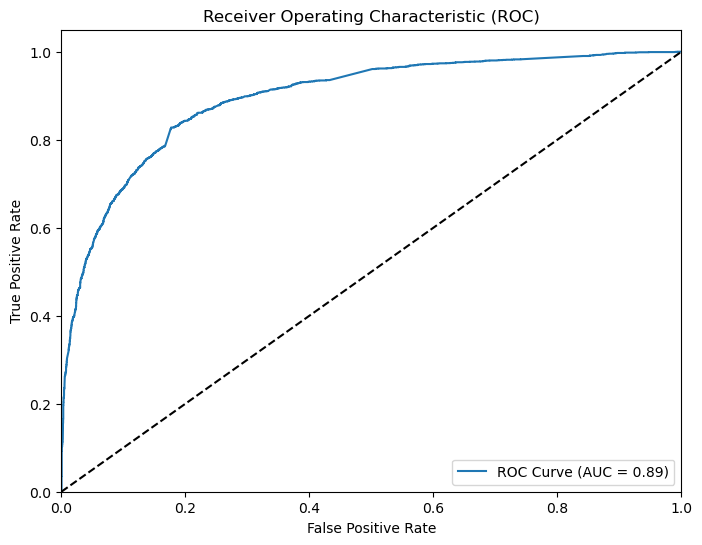

In [98]:
# ROC-AUC Score
roc_auc = roc_auc_score(Prediction_Final['Converted'], Prediction_Final['Conversion_Prob'])
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(Prediction_Final['Converted'], Prediction_Final['Conversion_Prob'])

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [102]:
# Define probability cutoffs
cutoffs = np.arange(0, 1.1, 0.1)

# Initialize the dataframe
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

# Function to calculate metrics based on confusion matrix
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) != 0 else 0
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0
    return accuracy, sensitivity, specificity

# Iterate over probability cutoffs and calculate accuracy, sensitivity, and specificity
for idx, cutoff in enumerate(cutoffs):
    # Generate predicted values based on the cutoff
    Prediction_Final['Predicted'] = Prediction_Final['Conversion_Prob'].apply(lambda x: 1 if x > cutoff else 0)
    
    # Calculate metrics
    accuracy, sensitivity, specificity = calculate_metrics(Prediction_Final['Converted'], Prediction_Final['Predicted'])
    
    # Store the results in the dataframe using loc
    cutoff_df.loc[idx] = [cutoff, accuracy, sensitivity, specificity]

# Display the result
cutoff_df

,prob,accuracy,sensitivity,specificity
0,0.0,0.381262,1.000000,0.000000
1,0.1,0.615492,0.972830,0.395302
2,0.2,0.776438,0.898621,0.701149
3,0.3,0.810451,0.856853,0.781859
4,0.4,0.819573,0.770073,0.850075
5,0.5,0.820346,0.699513,0.894803
6,0.6,0.815399,0.637470,0.925037
7,0.7,0.801948,0.563260,0.949025
8,0.8,0.776438,0.457421,0.973013
9,0.9,0.728355,0.302109,0.991004


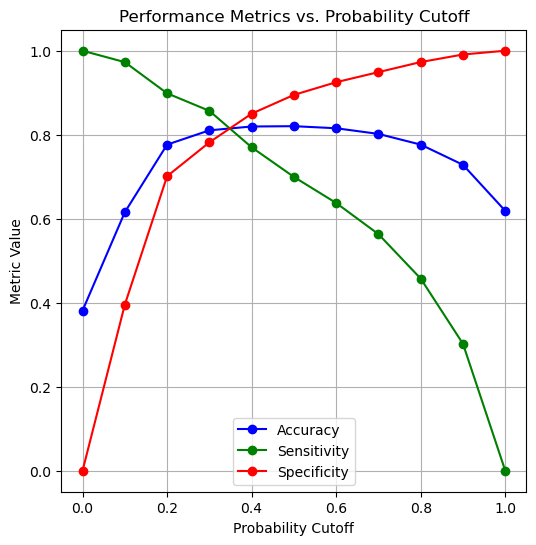

In [104]:
# Plotting accuracy, sensitivity, and specificity against cutoffs
plt.figure(figsize=(6, 6))

# Plot accuracy
plt.plot(cutoff_df['prob'], cutoff_df['accuracy'], marker='o', label='Accuracy', color='blue')

# Plot sensitivity
plt.plot(cutoff_df['prob'], cutoff_df['sensitivity'], marker='o', label='Sensitivity', color='green')

# Plot specificity
plt.plot(cutoff_df['prob'], cutoff_df['specificity'], marker='o', label='Specificity', color='red')

# Add labels and title
plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. Probability Cutoff')
plt.legend(loc='best')
plt.grid(True)

# Show plot
plt.show()

The Generalized Linear Model (GLM) results look promising overall, as many of the coefficients are statistically significant, and the model explains a good amount of the variance in the target variable.
Pseudo R-squared (CS): 0.4174 — Indicates that about 41.7% of the variance in the target variable is explained by the model. This is a decent value for a logistic regression model.
Log-Likelihood: -2552.0 — This is the log of the likelihood function. A higher (less negative) value indicates a better fit.
Deviance: 5104.0 — This is a measure of the model's goodness-of-fit. Lower deviance indicates a better fit.
Pearson chi-square: 7760 — This tests how well the model fits the data. Lower values are better.

## Prediction on Test Data

In [105]:
# We can copy the same process of scaling and other stuff that we did for the above

In [106]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [107]:
X_train.columns

Index(['Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'Lead Profile_Not Given', 'Lead Profile_Other Leads',
       'Lead Profile_Student of SomeSchool', 'Last Notable Activity_Modified',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [108]:
cols_t = X_train.columns

In [109]:
X_test = X_test[cols_t]

In [110]:
X_test

,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Working Professional,Lead Profile_Not Given,Lead Profile_Other Leads,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_Unreachable
4269,0.444982,0.145455,0,0,0,0,1,0,1,0,0,0,0
2376,0.000000,0.000000,1,0,0,0,1,0,1,0,0,0,0
7766,0.025968,0.090909,0,0,0,0,0,1,1,0,0,0,1
9199,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0
4359,0.000000,0.000000,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8649,0.127641,0.027273,0,0,0,0,0,0,1,0,0,0,0
2152,0.000000,0.000000,1,0,0,0,1,0,1,0,0,0,0
7101,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,0
5331,0.707746,0.054545,0,0,1,0,0,0,1,0,0,1,0


In [111]:
X_test_FaC = sm.add_constant(X_test)

Prediction_y_test = summary_2.predict(X_test_FaC)

In [112]:
# For Consistency we will reshape also for avoiding error
Prediction_y_test = Prediction_y_test.values.reshape(-1) # Reshaping to 1d array

In [114]:
# Combine actual and predicted values into a DataFrame in a concise way
Prediction_Final_Test = pd.DataFrame({
    'Converted': y_test.ravel(),  
    'Conversion_Prob': Prediction_y_test  # Already a 1D array after reshaping
})

In [115]:
Prediction_Final_Test['Predicted'] = (Prediction_Final_Test['Conversion_Prob'] > 0.5).astype(int)
Prediction_Final_Test

,Converted,Conversion_Prob,Predicted
0,1,0.560894,1
1,1,0.898003,1
2,1,0.790834,1
3,0,0.253855,0
4,1,0.933233,1
...,...,...,...
2767,0,0.176159,0
2768,1,0.898003,1
2769,0,0.134056,0
2770,0,0.174171,0


Confusion Matrix:
 [[1522  155]
 [ 342  753]]
Accuracy: 0.8207
Precision: 0.8293
Recall: 0.6877
F1 Score: 0.7519
ROC-AUC Score: 0.8963


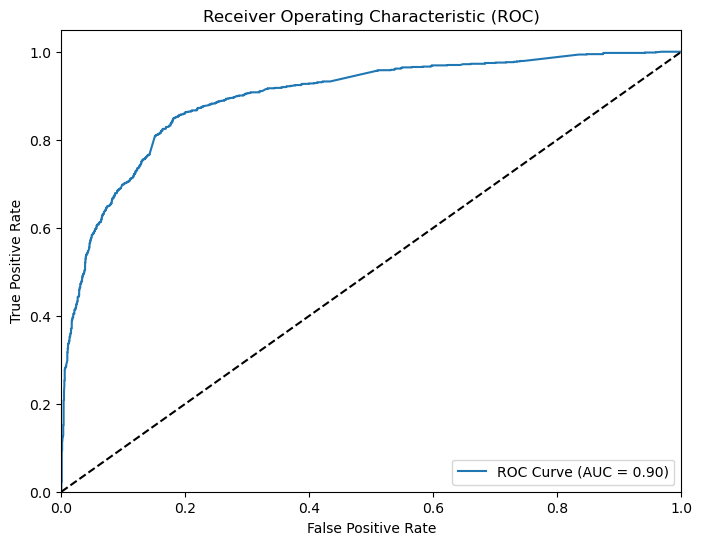

In [116]:
# Confusion Matrix
conf_matrix = confusion_matrix(Prediction_Final_Test['Converted'], Prediction_Final_Test['Predicted'])
print("Confusion Matrix:\n", conf_matrix)


In [117]:
# Accuracy
accuracy = accuracy_score(Prediction_Final_Test['Converted'], Prediction_Final_Test['Predicted'])
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8207


In [118]:
# Precision
precision = precision_score(Prediction_Final_Test['Converted'], Prediction_Final_Test['Predicted'])
print(f'Precision: {precision:.4f}')

Precision: 0.8293


In [119]:
# Recall
recall = recall_score(Prediction_Final_Test['Converted'], Prediction_Final_Test['Predicted'])
print(f'Recall: {recall:.4f}')

Recall: 0.6877


In [120]:
# F1-Score
f1 = f1_score(Prediction_Final_Test['Converted'], Prediction_Final_Test['Predicted'])
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.7519


ROC-AUC Score: 0.8963


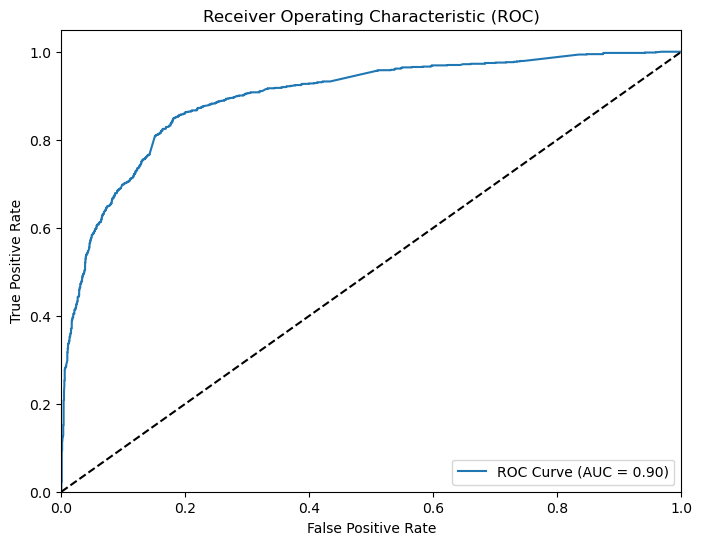

In [121]:
# ROC-AUC Score
roc_auc = roc_auc_score(Prediction_Final_Test['Converted'], Prediction_Final_Test['Conversion_Prob'])
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(Prediction_Final_Test['Converted'], Prediction_Final_Test['Conversion_Prob'])

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [122]:
# Define probability cutoffs
cutoffs = np.arange(0, 1.1, 0.1)

# Initialize the dataframe
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

# Function to calculate metrics based on confusion matrix
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1]) if (cm[1, 0] + cm[1, 1]) != 0 else 0
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) != 0 else 0
    return accuracy, sensitivity, specificity

# Iterate over probability cutoffs and calculate accuracy, sensitivity, and specificity
for idx, cutoff in enumerate(cutoffs):
    # Generate predicted values based on the cutoff
    Prediction_Final_Test['Predicted'] = Prediction_Final_Test['Conversion_Prob'].apply(lambda x: 1 if x > cutoff else 0)
    
    # Calculate metrics
    accuracy, sensitivity, specificity = calculate_metrics(Prediction_Final_Test['Converted'], Prediction_Final_Test['Predicted'])
    
    # Store the results in the dataframe using loc
    cutoff_df.loc[idx] = [cutoff, accuracy, sensitivity, specificity]

# Display the result
cutoff_df

,prob,accuracy,sensitivity,specificity
0,0.0,0.395022,1.000000,0.000000
1,0.1,0.620130,0.968950,0.392367
2,0.2,0.788600,0.899543,0.716160
3,0.3,0.825036,0.857534,0.803816
4,0.4,0.823232,0.751598,0.870006
5,0.5,0.820707,0.687671,0.907573
6,0.6,0.809524,0.615525,0.936196
7,0.7,0.794372,0.545205,0.957066
8,0.8,0.758658,0.425571,0.976148
9,0.9,0.712843,0.284932,0.992248


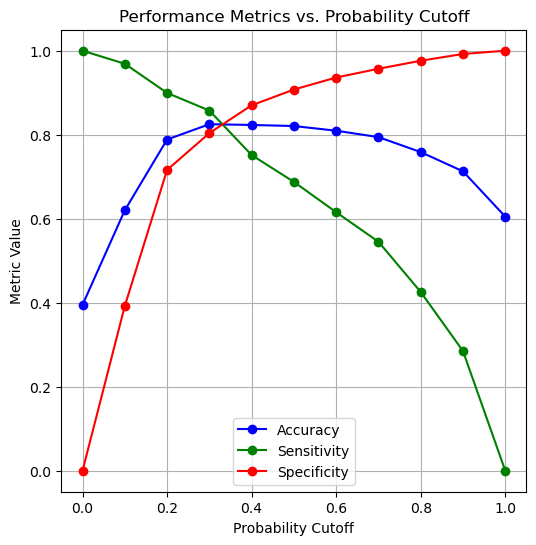

In [123]:
# Plotting accuracy, sensitivity, and specificity against cutoffs
plt.figure(figsize=(6, 6))

# Plot accuracy
plt.plot(cutoff_df['prob'], cutoff_df['accuracy'], marker='o', label='Accuracy', color='blue')

# Plot sensitivity
plt.plot(cutoff_df['prob'], cutoff_df['sensitivity'], marker='o', label='Sensitivity', color='green')

# Plot specificity
plt.plot(cutoff_df['prob'], cutoff_df['specificity'], marker='o', label='Specificity', color='red')

# Add labels and title
plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. Probability Cutoff')
plt.legend(loc='best')
plt.grid(True)

# Show plot
plt.show()

## Conclusion and Insights

##### Based on the model and features selected we did a few iteration and based on that the following insights where derived:
##### 1) Total Spent on Website - For every unit increase in the total time spent on the website, the log-odds of conversion increase by 4.06, meaning that users who spend more time on the website are significantly more likely to convert. This feature is the most impactful because of its high coefficient and extremely low p-value, indicating strong predictive power.
##### 2) Page Views Per Visit - A negative coefficient of -7.15 suggests that higher page views per visit are associated with a lower likelihood of conversion. This could mean that users who browse more pages without converting might be less engaged. The significance and large magnitude of this coefficient make it one of the most important factors.
##### 3) Lead Origin_Lead Add Form -  Leads originating from the "Lead Add Form" are 2.7 times more likely to convert, showing a strong association with conversions. This is another key feature due to its high coefficient and significance.
##### 4) Lead Source_Welingak Website - Leads coming from the "Welingak Website" are also more likely to convert, with a coefficient of 2.54, making it an important feature, though less impactful compared to "Lead Add Form."
##### 5) Do Not Email_Yes -  Leads who opted out of receiving emails are less likely to convert, with a negative coefficient of -1.15. This shows that email communication plays an important role in conversions.
##### 6) Last Activity_SMS Sent - If the last activity was an SMS sent, the likelihood of conversion increases. This feature is quite important as well, with a moderately high positive coefficient.
##### 7) Lead Profile_Not Given - If the lead profile is not provided, the likelihood of conversion significantly decreases. This suggests that having more detailed information about the lead increases the chances of conversion.

Conclusion: Most Important Features
Total Time Spent on Website (High positive impact)
Page Views Per Visit (High negative impact)
Lead Origin_Lead Add Form (High positive impact)
Do Not Email_Yes (Negative impact)
Last Activity_SMS Sent (Positive impact)